## Exploratory Project - Smit Lunagariya


#### Implementation of Support Vector Regression

In [1]:
# Importing Required libraries

import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Creating the artificial data set
x = np.linspace(-10.2,10, num=81).reshape(-1,1)
y = np.sin(x)/x
yhat = y + np.random.normal(scale=0.1, size=81).reshape(-1,1) #Adding noise to original labels

In [3]:
# Creating the Support Vector Regression instance by importing it from sklearn
svr = SVR(epsilon=0.05, C=512, gamma=16)

In [4]:
svr.fit(x, yhat)

/home/smit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=512, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=16,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
pred = svr.predict(x)

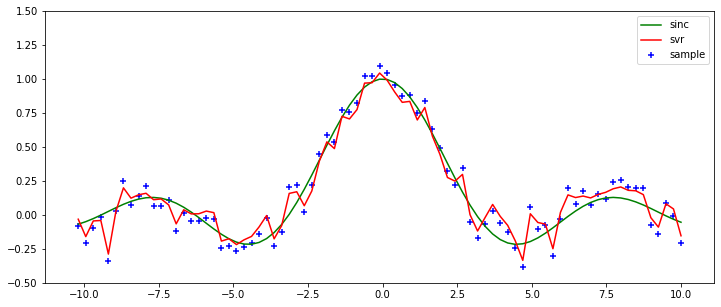

In [6]:
# Visualizing the original synthetic dataset with the output produced
plt.figure(figsize=(12,5))
plt.plot(x, y, label='sinc', color='green')
plt.scatter(x, yhat,marker='+', label='sample', color='blue')
plt.plot(x, pred, label='svr', color='red')
plt.ylim([-0.5,1.5])
plt.legend()

In [7]:
# Evaluation of the results based on various metrics
def Evaluation_of_result(y, ypred):
    def mean_abs_error(y, ypred):
        return mean_absolute_error(y, ypred)

    def root_mean_sq_error(y, ypred):
        return math.sqrt(mean_squared_error(y, ypred))

    def SSE(y, ypred):
        y.reshape(-1,1)
        ypred.reshape(-1,1)
        return mean_squared_error(y, ypred)*(y.shape[0])

    def SST(y):
        y.reshape(-1,1)
        return np.var(y)*(y.shape[0])

    def SSR(ypred):
        ypred.reshape(-1,1)
        return np.var(ypred)*(ypred.shape[0])

    print("MAE: ", mean_abs_error(y, ypred))
    print("RMSE: ", root_mean_sq_error(y, ypred))
    print("SSE: ", SSE(y, ypred))
    print("SSR: ", SSR(ypred))
    print("SST: ", SST(y))
    print("SSR/SST: ", SSR(ypred)/SST(y))
    print("SSE/SST: ", SSE(y,ypred)/SST(y))

In [8]:
print("The evaluation of results of Twin SVR are as follows:")
Evaluation_of_result(y,pred)

The evaluation of results of Twin SVR are as follows:
MAE:  0.07586513699037578
RMSE:  0.09466909665621764
SSE:  0.7259412667980466
SSR:  9.117954337049456
SST:  9.942618950174554
SSR/SST:  0.9170576065262342
SSE/SST:  0.07301308341755387
